# Abalone Age Prediction

Description: The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope. There are several attributes to detmine the age of abalone. Here in this datset we are counting number of rin gs to predict the age of abalone; thus is problem is regression. Rings is the target feature  which will train the model to predict the age. 

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [117]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [118]:
df=pd.read_csv("abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [119]:
#observation: There are total 4177 rows with 9 columns considering 'Rings' as target feature.

In [120]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [53]:
#statistical Summary 

In [54]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [55]:
# min and max values giving idea about Range, which shows that there is not much difference in range.

In [56]:
#checking the data dimension

In [57]:
df.shape

(4177, 9)

Cleaning of Data

In [58]:
#checking the null values

In [59]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Observation: we can see froim output that there is no null values in dataset

# EDA

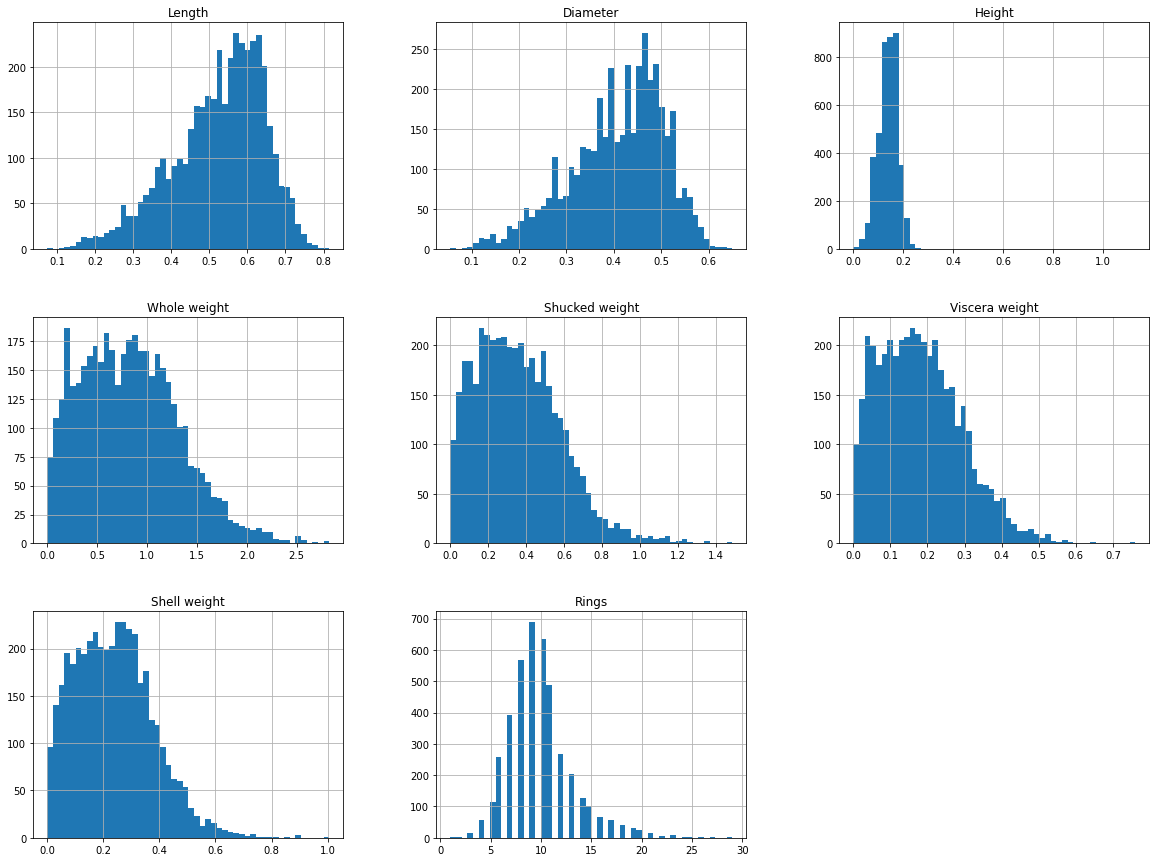

In [60]:
df.hist(bins=50,figsize=(20,15))
plt.show()

Here we can visualise all the features of datset with histogram graph.

# Checking Correlation

In [61]:
corr_mat=df.corr()
corr_mat['Rings']
corr_mat


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [62]:
#plotting heatmap to find relationship with variables

Observation: we can see that 'sex' column is missing while performing correlation.

observation: we can see that variable 'sex' column is missing in heatmap to observe the relationship because we have string values in 'sex'
    column thus we need to convert it in numeric form before using any algorithm. This is why we'll convert categorial feature into numeric 
    feature by Label Encoder.

# Label Encoder

In [63]:
LE=LabelEncoder()
df['Sex']=LE.fit_transform(df['Sex'])
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Here we can see that sex column has been converted into numeric feature.

In [64]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


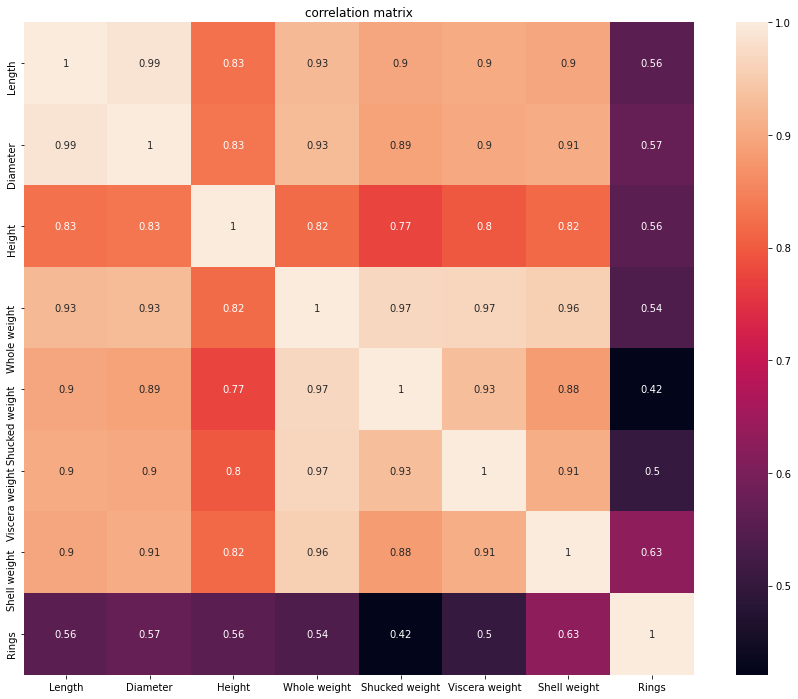

In [65]:
plt.figure(figsize=[15,12])
sns.heatmap(corr_mat,annot=True)
plt.title('correlation matrix')
plt.show()

checking skewness

In [66]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [67]:
#Observation: The data is not normallised but its near to normalization. 

<AxesSubplot:xlabel='Height', ylabel='Density'>

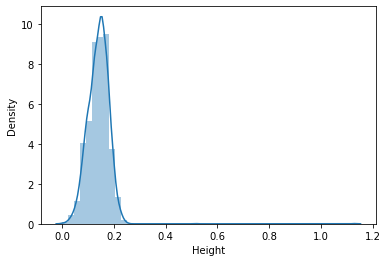

In [68]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Sex', ylabel='Density'>

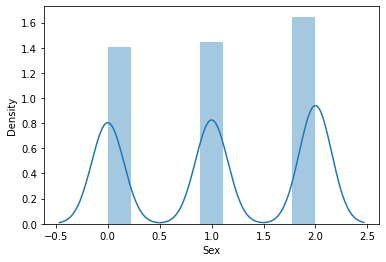

In [69]:
sns.distplot(df['Sex'])

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

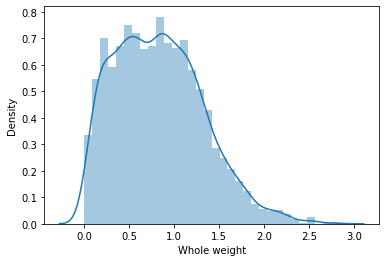

In [70]:
sns.distplot(df['Whole weight'])

In [71]:
#Observation: above graphs and skew values for all columns shows that dataset is skewed.

In [72]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [73]:
#splitting the independant and target variables in x & y.

Observation:  As we are predicting the rings of each abalone thus we'll remove it from dataset and pass it separately.

In [75]:
x=df.drop(['Rings'],axis=1)
y=df['Rings']

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=50)

In [107]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Decision Tree Regressor

In [109]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train, y_train)
r2_score(y_train, tree_model.predict(x_train)) 

1.0

# Linear Regression

In [121]:
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(x_train,y_train)
r2_score(y_train,lr.predict(x_train))

0.5273939034884678

# Random Forest Regressor

In [122]:
from sklearn.ensemble import RandomForestRegressor
new_random=RandomForestRegressor()
new_random.fit(x_train,y_train)
r2_score(y_train,new_random.predict(x_train))

0.9360340702176543

In [123]:
r2_score(y_test,new_random.predict(x_test))

0.5549020015963473

In [ ]:
Conclusion: Amongst all the models Random Forest Regressor showing the best accuracy result.